In [175]:
import sklearn.datasets
import pandas as pd

# Load the breast cancer dataset
dataset = sklearn.datasets.load_breast_cancer()

# Create a DataFrame from the dataset
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

# 1. Perform EDA

### 1.1. Create an EDA report

In [176]:
# from ydata_profiling import ProfileReport

# # Create a profile report
# profile = ProfileReport(df, title="Breast Cancer Dataset Profiling Report", explorative=True)
# profile.to_file("breast_cancer_profiling_report.html")

### 1.2. Plot the data based on the target variable

In [177]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns='target'))

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply UMAP
umap_model = umap.UMAP(n_components=2)
X_umap = umap_model.fit_transform(X_scaled)

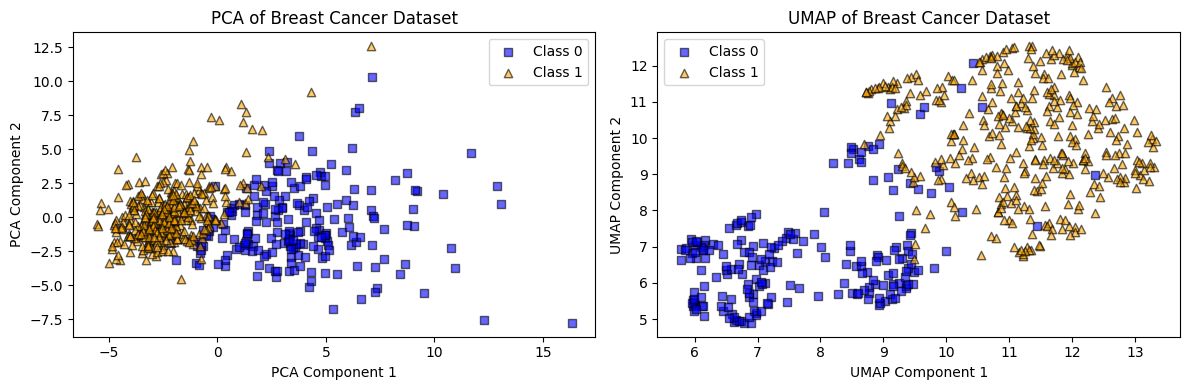

In [178]:
import matplotlib.pyplot as plt
import numpy as np

projections = [("PCA", X_pca), ("UMAP", X_umap)]
markers = ['s', '^']
colors = ['blue', 'orange']
classes = np.unique(df['target'])

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
for ax, (name, X_proj) in zip(axs, projections):
    for i, cls in enumerate(classes):
        
        idx = df['target'] == cls
        ax.scatter(X_proj[idx, 0], X_proj[idx, 1],
                   marker=markers[i], 
                   c=colors[i], 
                   edgecolor='k',
                   label=f'Class {cls}',
                   alpha=0.6)
        
    ax.set_title(f'{name} of Breast Cancer Dataset')
    ax.set_xlabel(f'{name} Component 1')
    ax.set_ylabel(f'{name} Component 2')
    ax.legend()

plt.tight_layout()
plt.show()

# 2. Define Classification Models

In [179]:
X = X_scaled
y = df['target']

### 2.1. Linear Model

Classification Report:
              precision    recall  f1-score   support

   malignant       0.99      0.92      0.95       212
      benign       0.95      0.99      0.97       357

    accuracy                           0.96       569
   macro avg       0.97      0.95      0.96       569
weighted avg       0.97      0.96      0.96       569



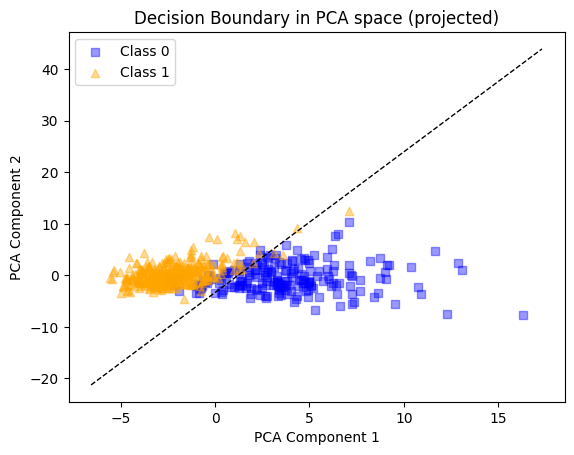

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict using the linear regression model
y_pred = model.predict(X)
y_pred_classes = (y_pred > 0.5).astype(int)

# Generate classification report
class_report = classification_report(y, y_pred_classes, target_names=dataset.target_names)
print('Classification Report:')
print(class_report)

# Calculate the decision boundary in PCA space
w_pca = pca.components_.dot(model.coef_.T).flatten()  # shape (2,)
b = model.intercept_

# Plot decision boundary line: w_pca[0]*x + w_pca[1]*y + b = 0.5
# => y = -(w_pca[0]*x + b - 0.5) / w_pca[1]
x_vals = np.linspace(X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1, 100)
y_vals = -(w_pca[0] * x_vals + b - 0.5) / w_pca[1]

for i, cls in enumerate(classes):
    idx = df['target'] == cls
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1],
                marker=markers[i],
                c=colors[i],
                label=f'Class {cls}',
                alpha=0.4)

plt.plot(x_vals, y_vals, 'k--', linewidth=1)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()

plt.title("Decision Boundary in PCA space (projected)")
plt.show()